In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('credit_card_approval.csv')

## DATA DICTIONARY

                     'CODE_GENDER':        'Gender',
                     'FLAG_OWN_CAR':       'Has_a_car',
                     'FLAG_OWN_REALTY':    'Has_a_property',
                     'CNT_CHILDREN':       'Children_count',
                     'AMT_INCOME_TOTAL':   'Income',
                     'NAME_EDUCATION_TYPE':'Education_level',
                     'NAME_FAMILY_STATUS': 'Marital_status',
                     'NAME_HOUSING_TYPE':  'Dwelling',
                     'DAYS_BIRTH':         'Days_birth',
                     'DAYS_EMPLOYED':      'Days_employed',
                     'FLAG_MOBIL':         'Has_a_mobile_phone',
                     'FLAG_WORK_PHONE':    'Has_a_work_phone',
                     'FLAG_PHONE':         'Has_a_phone',
                     'FLAG_EMAIL':         'E-mail',
                     'JOB':                'Job_title',
                     'BEGIN_MONTHS':       'Begin_month',
                     'STATUS':             'Status',
                     'TARGET':             'Target'

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

In [ ]:
df.shape

(537667, 19)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,537667.0,5.079231e+06,42001.999788,5008806.0,5044925.0,5079091.0,5115755.0,5150487.0
AMT_INCOME_TOTAL,537667.0,1.971171e+05,104138.963465,27000.0,135000.0,180000.0,229500.0,1575000.0
DAYS_BIRTH,537667.0,-1.501096e+04,3416.418092,-24611.0,-17594.0,-14785.0,-12239.0,-7489.0
DAYS_EMPLOYED,537667.0,-2.762030e+03,2393.919456,-15713.0,-3661.0,-2147.0,-1050.0,-17.0
FLAG_MOBIL,537667.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,537667.0,2.816148e-01,0.449787,0.0,0.0,0.0,1.0,1.0
FLAG_PHONE,537667.0,2.988932e-01,0.457773,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,537667.0,1.007296e-01,0.300971,0.0,0.0,0.0,0.0,1.0
BEGIN_MONTHS,537667.0,-1.930524e+01,14.037827,-60.0,-29.0,-17.0,-8.0,0.0
TARGET,537667.0,3.649099e-03,0.060298,0.0,0.0,0.0,0.0,1.0


## Pre Processing

In [ ]:
# missing/null values
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
JOB                    0
BEGIN_MONTHS           0
STATUS                 0
TARGET                 0
dtype: int64

In [ ]:
df['CODE_GENDER'].value_counts()

F    333832
M    203835
Name: CODE_GENDER, dtype: int64

In [ ]:
df['FLAG_EMAIL'].value_counts()

0    483508
1     54159
Name: FLAG_EMAIL, dtype: int64

In [ ]:
df['FLAG_OWN_CAR'].value_counts()

N    306207
Y    231460
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
df['FLAG_OWN_REALTY'].value_counts()

Y    345471
N    192196
Name: FLAG_OWN_REALTY, dtype: int64

In [ ]:
df['FLAG_PHONE'].value_counts()

0    376962
1    160705
Name: FLAG_PHONE, dtype: int64

In [ ]:
df['FLAG_WORK_PHONE'].value_counts()

0    386252
1    151415
Name: FLAG_WORK_PHONE, dtype: int64

In [ ]:
df['CNT_CHILDREN'].value_counts()

No children    343151
1 children     127695
2+ children     66821
Name: CNT_CHILDREN, dtype: int64

In [ ]:
df['FLAG_MOBIL'].value_counts()

1    537667
Name: FLAG_MOBIL, dtype: int64

In [ ]:
# dropping variable Flag_mobil since it has only value 1

In [ ]:
df.drop(columns='FLAG_MOBIL',axis=1,inplace=True)

In [ ]:
df['ID']=df['ID'].astype('float64')

## Variable Categorization

In [ ]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(include=np.object)

In [ ]:
df_num.shape # 10 numeric variables

(537667, 9)

In [ ]:
df_cat.shape # 9 numeric variables

(537667, 9)

## Exploratory Data Analysis

* Univariate Analaysis
* Bivariate Analysis
* Outlier Identidification & REmoval
* Feature Engineering
* Statistical Analysis
* Scaling & Encoding

## Univariate Analysis -
### Numeric Vars : Distplot/Histogram to check the shape of data
### cat vars : CountPlot

### Uivariate analysis for numeric variables ( Distribution of variables)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def univariate_analysis_numeric(data, numeric_columns):
    for column in numeric_columns:

        plt.figure(figsize=(5, 3))
        sns.distplot(data[column])
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()



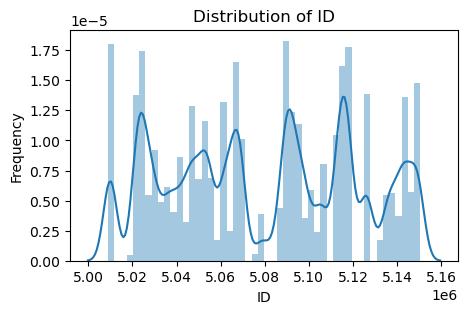

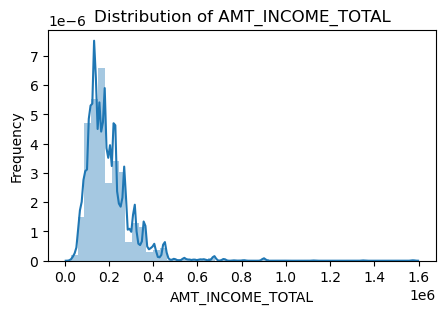

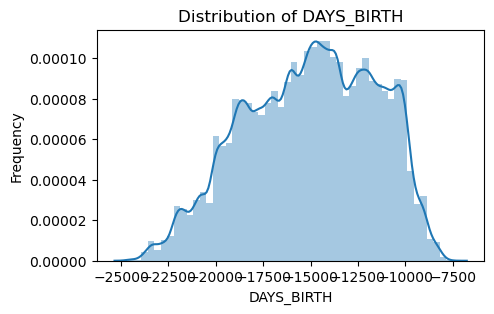

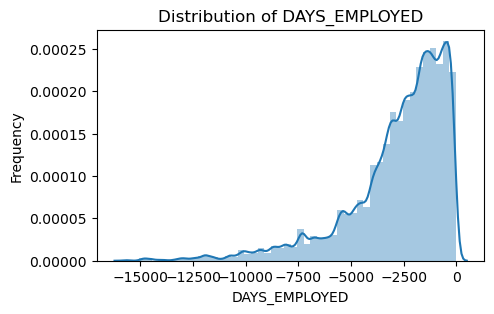

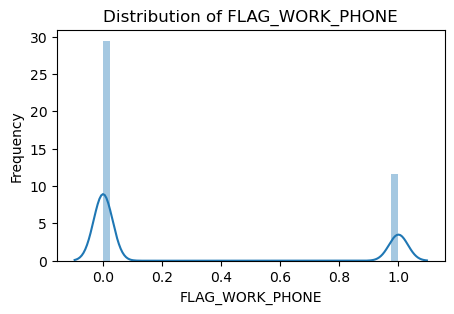

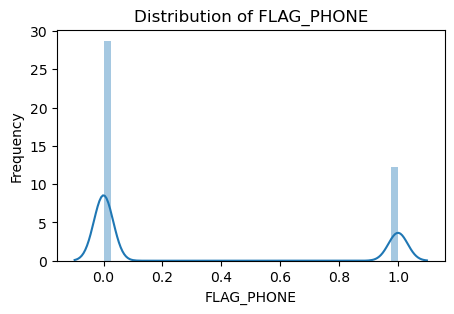

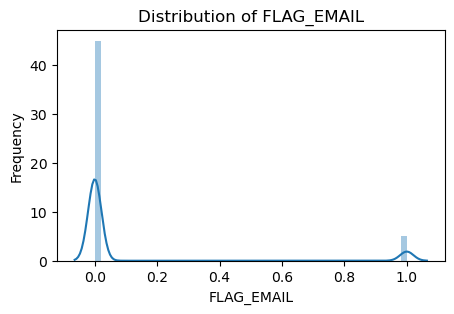

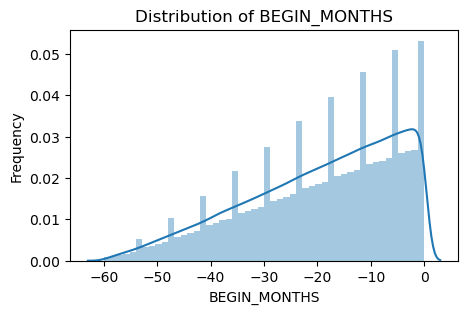

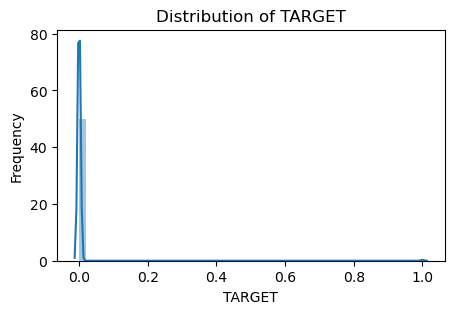

In [ ]:
univariate_analysis_numeric(df,df_num)

### Uivariate analysis for categoric variables

In [ ]:
def univariate_analysis_categoric(df,df_cat):
    for column in df_cat:

        plt.figure(figsize=(5, 3))
        sns.countplot(y=column,data=df)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

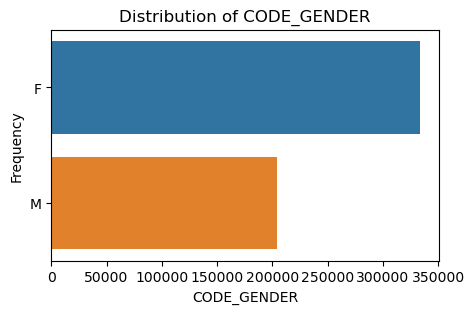

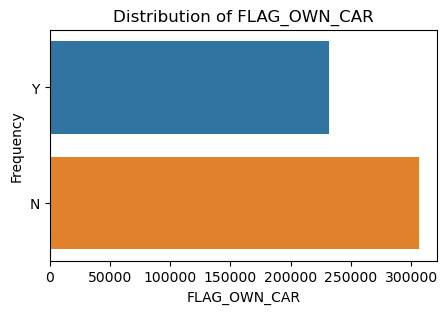

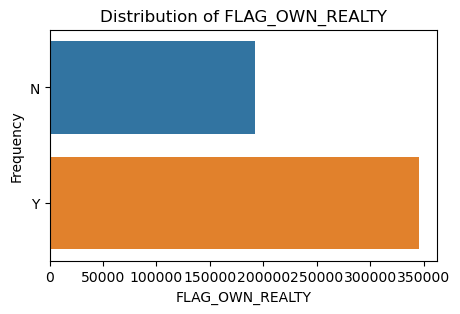

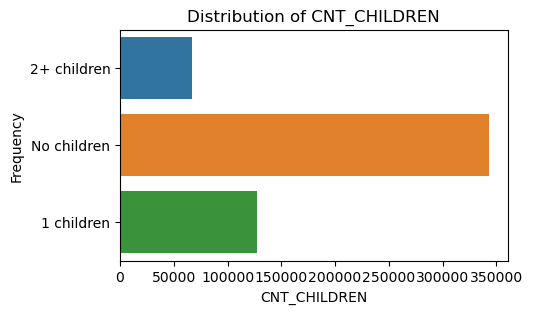

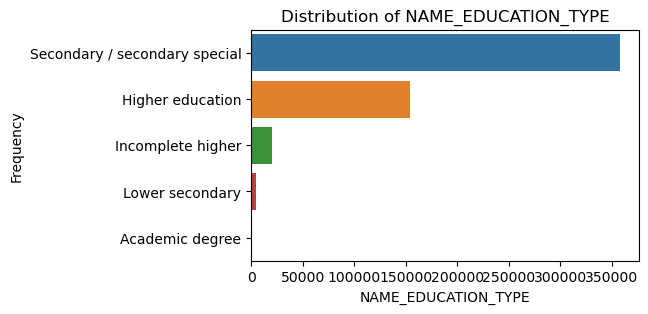

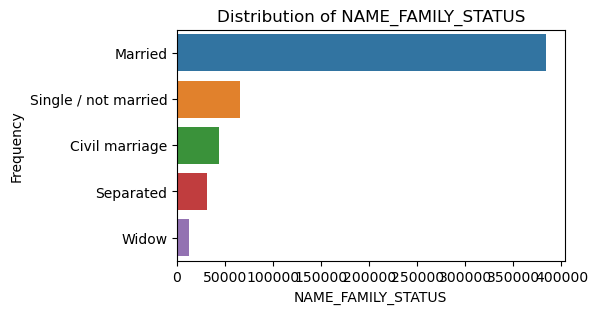

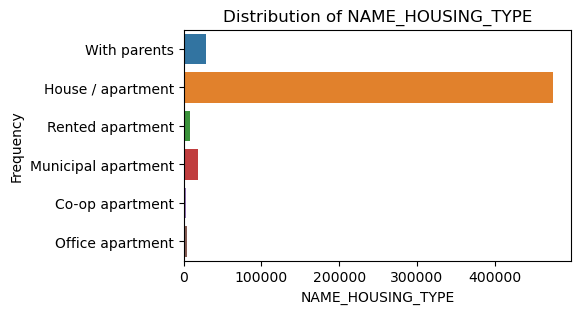

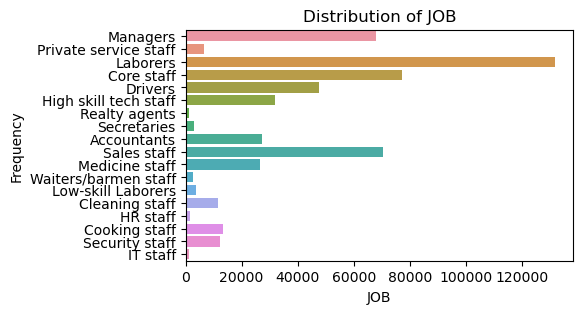

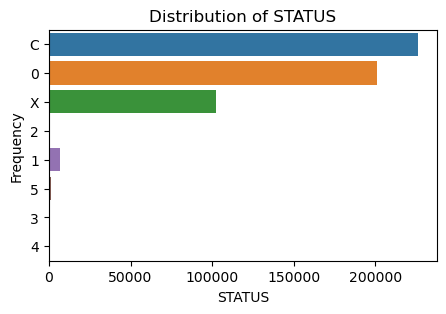

In [ ]:
univariate_analysis_categoric(df,df_cat)

## Bi-variate Analysis (Num vs Num)

Bivariate Analysis for (ID, TARGET):


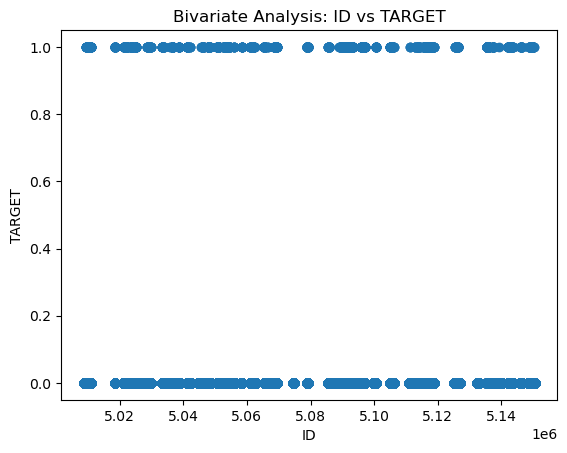

Bivariate Analysis for (AMT_INCOME_TOTAL, TARGET):


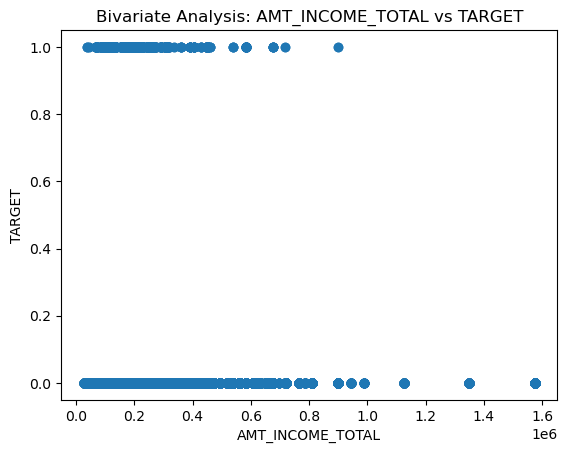

Bivariate Analysis for (DAYS_BIRTH, TARGET):


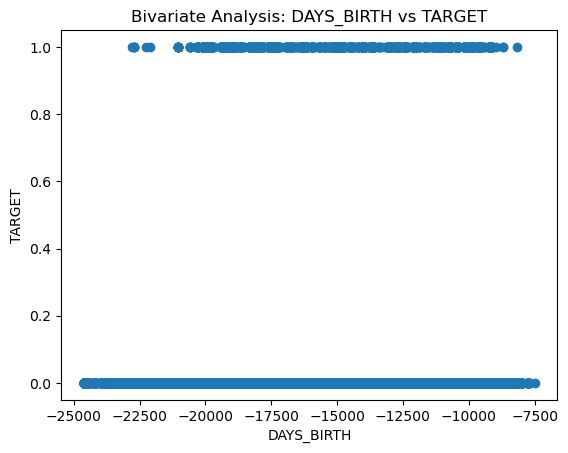

Bivariate Analysis for (DAYS_EMPLOYED, TARGET):


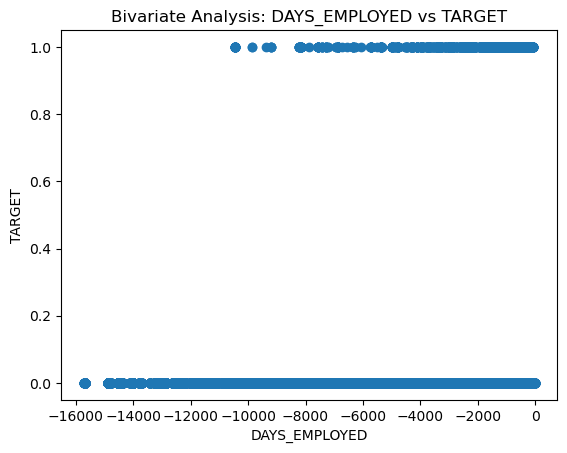

Bivariate Analysis for (FLAG_WORK_PHONE, TARGET):


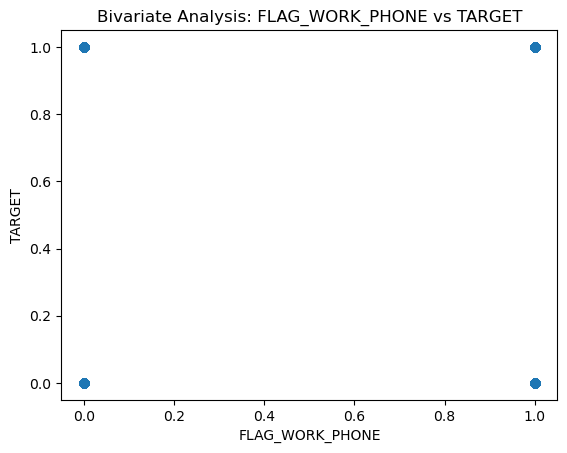

Bivariate Analysis for (FLAG_PHONE, TARGET):


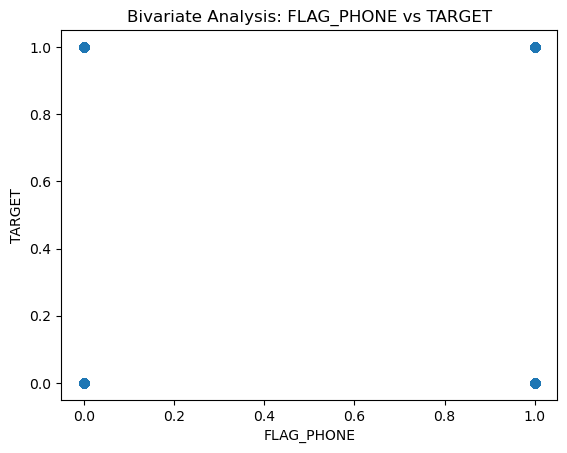

Bivariate Analysis for (FLAG_EMAIL, TARGET):


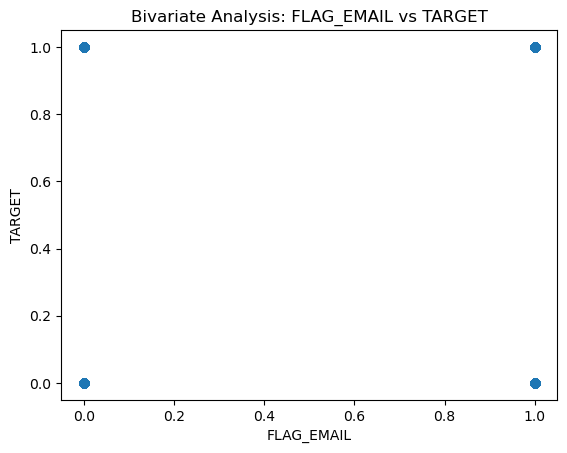

Bivariate Analysis for (BEGIN_MONTHS, TARGET):


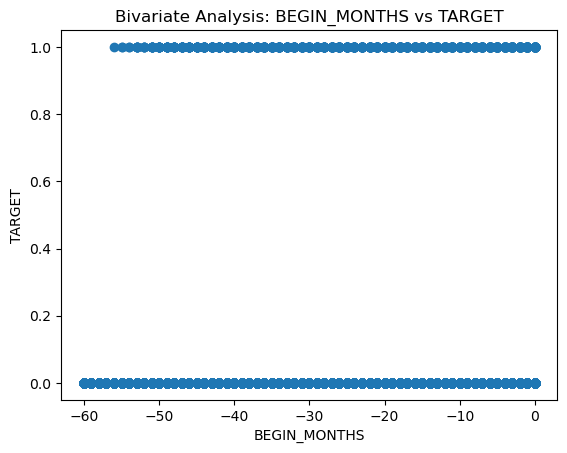

In [ ]:
target_column ='TARGET'

predictor_columns = [col for col in df_num.columns if col != target_column]

for predictor in predictor_columns:
    print(f"Bivariate Analysis for ({predictor}, {target_column}):")
    plt.scatter(df_num[predictor], df_num[target_column])
    plt.xlabel(predictor)
    plt.ylabel(target_column)
    plt.title(f'Bivariate Analysis: {predictor} vs {target_column}')
    plt.show()

## Bivariate Analysis(Cat Vs Num)

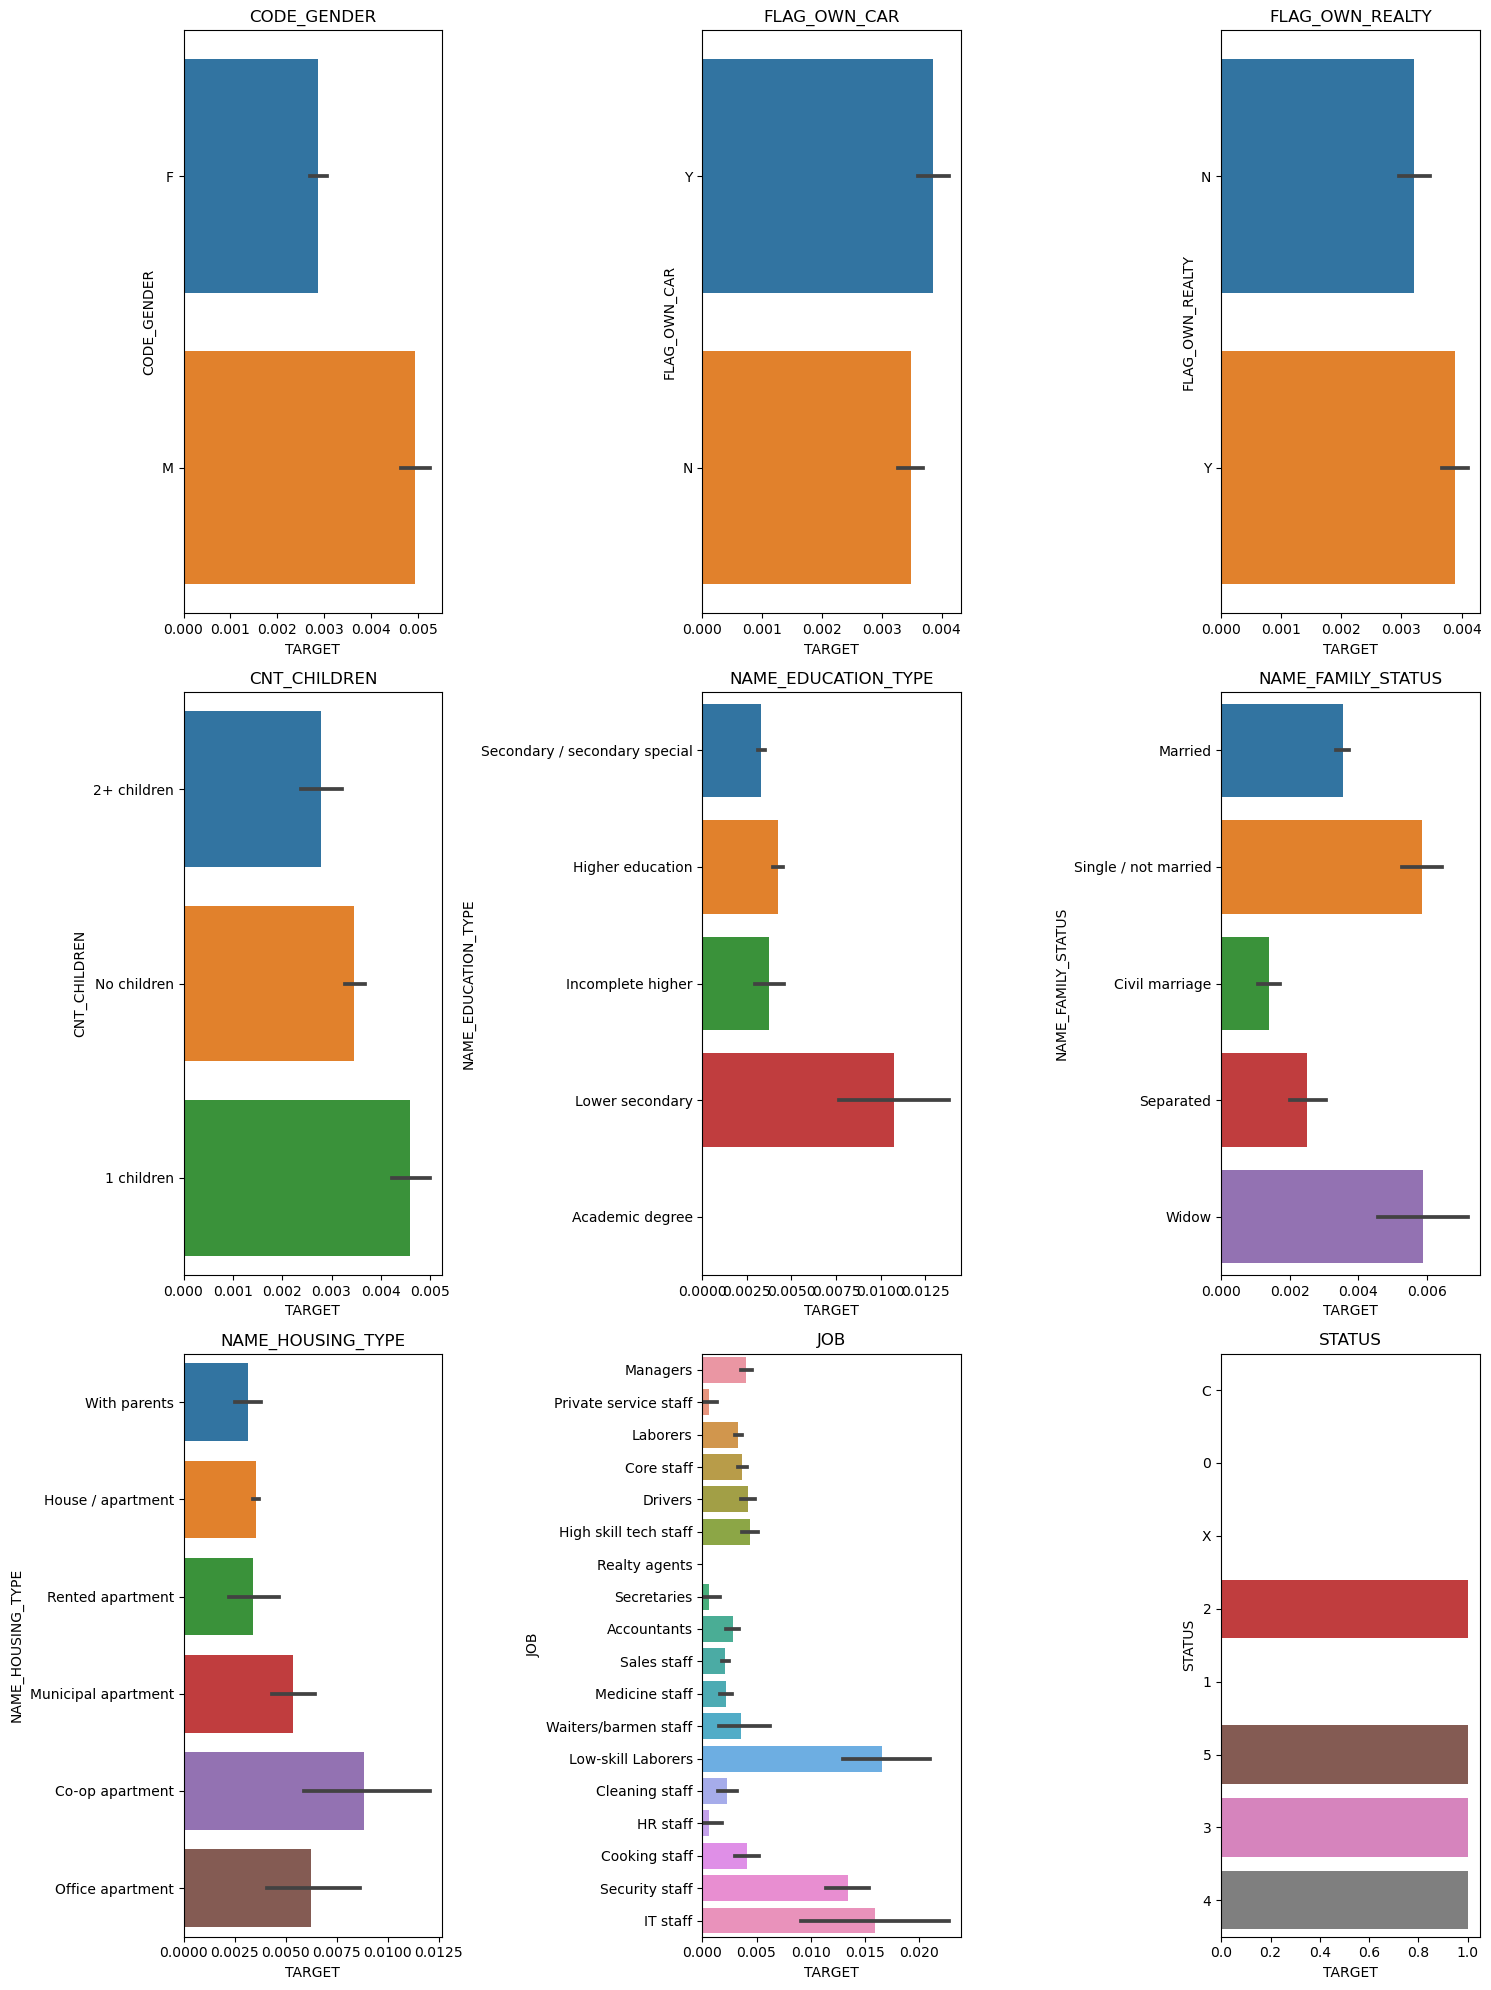

In [ ]:
cat_vars=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'JOB',
       'STATUS']

nrows=3
ncols=3
repeater=1

plt.figure(figsize=(15,20))

for i in cat_vars:
    plt.subplot(3,3,repeater)
    sns.barplot(y=i,x='TARGET',data=df)
    plt.title(i)
    repeater=repeater+1

plt.tight_layout()
plt.show()

### Target Proportionality

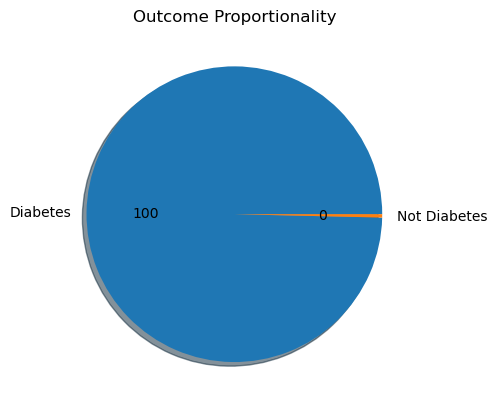

In [ ]:

plt.pie(df.TARGET.value_counts(),
        labels= ['Diabetes', 'Not Diabetes'],
        autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

<Axes: ylabel='TARGET'>

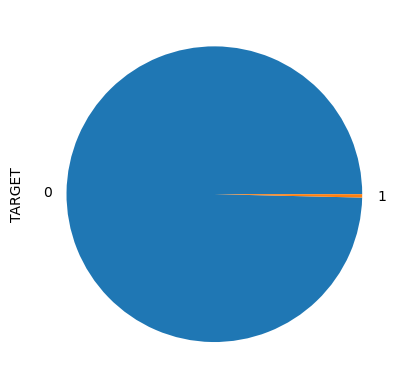

In [ ]:
df['TARGET'].value_counts().plot(kind='pie')

## Correlation

In [ ]:
correlation_matrix=df.corr()
correlation_matrix

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS,TARGET
ID,1.000000,-0.024915,0.029609,0.014325,0.098981,0.014584,-0.072886,0.004673,0.016717
AMT_INCOME_TOTAL,-0.024915,1.000000,-0.047838,-0.009500,-0.078836,0.007914,0.067699,-0.001829,0.002887
DAYS_BIRTH,0.029609,-0.047838,1.000000,0.324231,0.041483,-0.030423,0.055471,0.051247,-0.005401
DAYS_EMPLOYED,0.014325,-0.009500,0.324231,1.000000,0.003695,-0.026980,0.041690,0.044414,0.019230
FLAG_WORK_PHONE,0.098981,-0.078836,0.041483,0.003695,1.000000,0.372385,-0.069643,-0.002339,0.004353
FLAG_PHONE,0.014584,0.007914,-0.030423,-0.026980,0.372385,1.000000,0.014056,-0.007564,0.008663
FLAG_EMAIL,-0.072886,0.067699,0.055471,0.041690,-0.069643,0.014056,1.000000,0.005860,-0.001807
BEGIN_MONTHS,0.004673,-0.001829,0.051247,0.044414,-0.002339,-0.007564,0.005860,1.000000,-0.001646
TARGET,0.016717,0.002887,-0.005401,0.019230,0.004353,0.008663,-0.001807,-0.001646,1.000000


<Axes: >

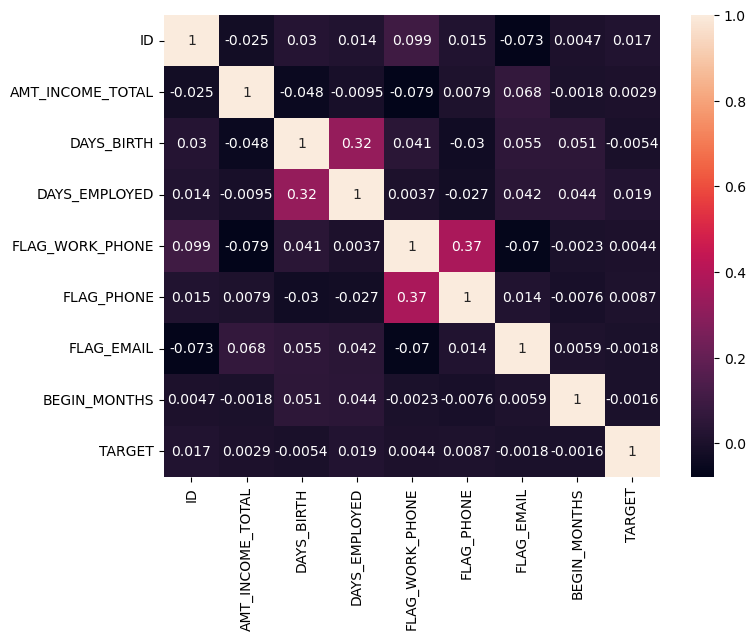

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix ,annot=True)

In [ ]:
# there is no positive correlation among variables

In [ ]:
threshold = 0.6
correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print(f"\nVariables correlated among themselves:\n{correlated_pairs}")


Variables correlated among themselves:
[]


### Multi-collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = df_num.drop('TARGET', axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif_data)

            Feature        VIF
0                ID  25.649639
1  AMT_INCOME_TOTAL   4.644062
2        DAYS_BIRTH  22.845693
3     DAYS_EMPLOYED   2.609951
4   FLAG_WORK_PHONE   1.645574
5        FLAG_PHONE   1.666050
6        FLAG_EMAIL   1.128312
7      BEGIN_MONTHS   2.901049


In [ ]:
# VIF greater than 10 indicates high  multi collinearity

### Outlier Identification and treatment

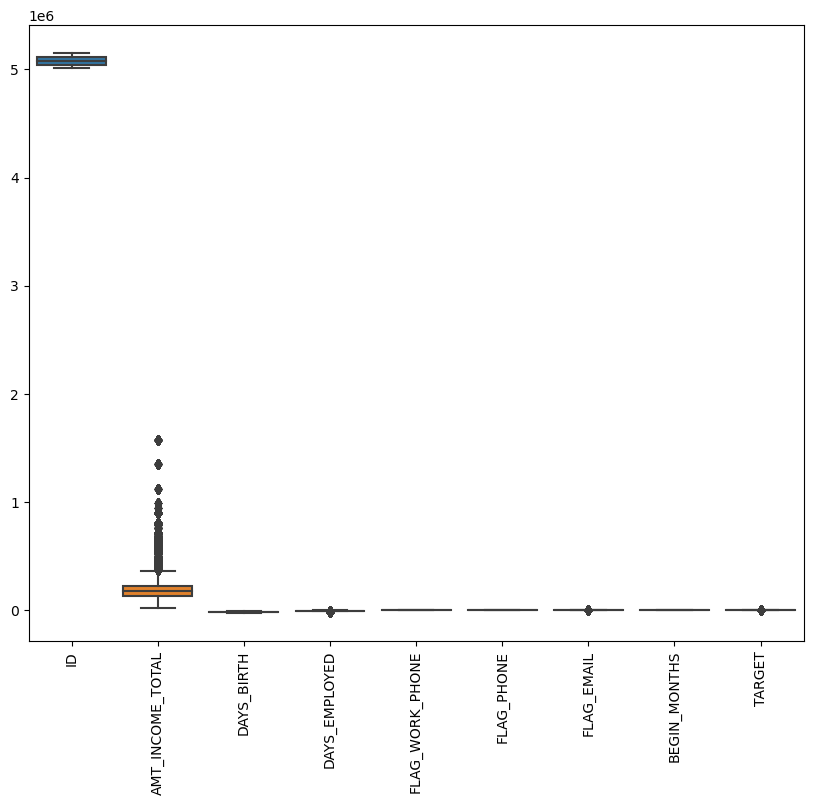

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

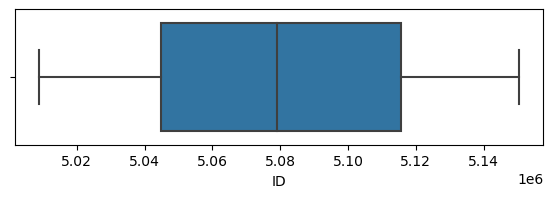

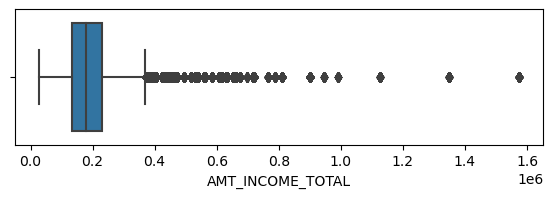

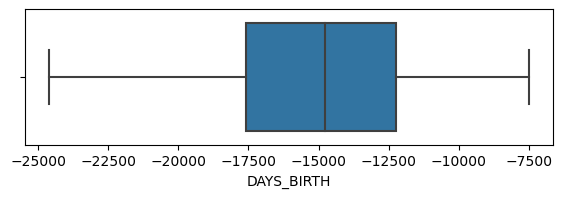

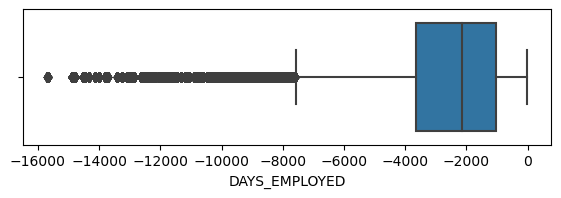

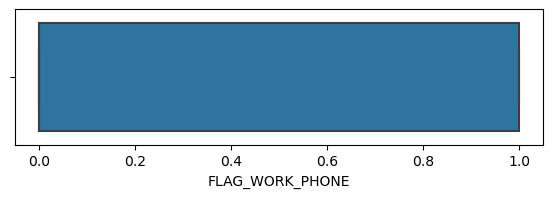

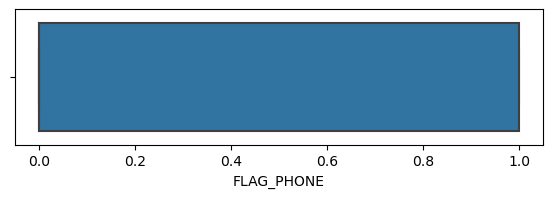

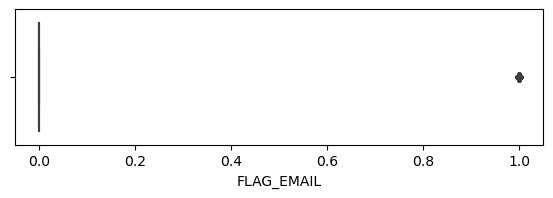

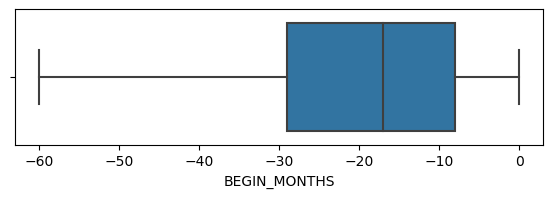

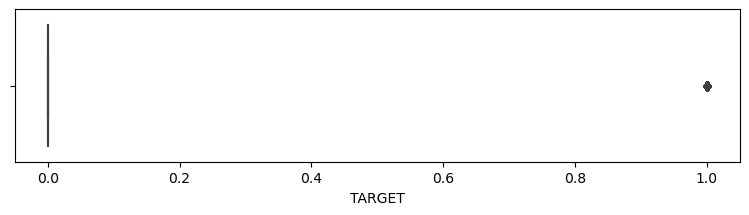

In [ ]:
for i,j in enumerate(df_num):
    plt.figure(figsize=(15,25))
    plt.subplot(12,2,i+1)
    sns.boxplot(x=j,data=df_num)
plt.tight_layout()
plt.show()

In [ ]:
# amt_income_total  and Days_employed has outliers lets treat them with iqr method

### Preprocessing


In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
data=df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

sc=StandardScaler()


In [ ]:
for i in df_cat.columns:
    print(i)
    print(df_cat[i].value_counts(normalize=True)*100)
    print("\n")

CODE_GENDER
F    62.088988
M    37.911012
Name: CODE_GENDER, dtype: float64


FLAG_OWN_CAR
N    56.95105
Y    43.04895
Name: FLAG_OWN_CAR, dtype: float64


FLAG_OWN_REALTY
Y    64.253711
N    35.746289
Name: FLAG_OWN_REALTY, dtype: float64


CNT_CHILDREN
No children    63.822217
1 children     23.749830
2+ children    12.427953
Name: CNT_CHILDREN, dtype: float64


NAME_EDUCATION_TYPE
Secondary / secondary special    66.642922
Higher education                 28.599486
Incomplete higher                 3.829508
Lower secondary                   0.847365
Academic degree                   0.080719
Name: NAME_EDUCATION_TYPE, dtype: float64


NAME_FAMILY_STATUS
Married                 71.420229
Single / not married    12.264841
Civil marriage           8.198941
Separated                5.838930
Widow                    2.277060
Name: NAME_FAMILY_STATUS, dtype: float64


NAME_HOUSING_TYPE
House / apartment      88.191576
With parents            5.458955
Municipal apartment     3.352075
Rente

In [ ]:
# Convert category attributes with only 2  unique values to numeric by assigning lables

label_encoder=LabelEncoder()

data['CODE_GENDER']=label_encoder.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR']=label_encoder.fit_transform(data['FLAG_OWN_CAR'])
data['FLAG_OWN_REALTY']=label_encoder.fit_transform(data['FLAG_OWN_REALTY'])

In [ ]:
# Convert category attributes with more than 2 unique values to numeric by using one-hot endcoding

data=pd.get_dummies(data,columns=['CNT_CHILDREN','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','JOB','STATUS'],drop_first=True)

In [ ]:
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS,...,JOB_Secretaries,JOB_Security staff,JOB_Waiters/barmen staff,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,0,1,0,270000.0,-13258,-2300,0,0,0,-6,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,81000.0,-17876,-377,1,1,0,-4,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,270000.0,-19579,-1028,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,112500.0,-15109,-1956,0,0,0,-3,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,139500.0,-17281,-5578,1,0,0,-29,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=data.drop('TARGET',axis=1)
y=data['TARGET']

In [ ]:
x_cat=x.select_dtypes(exclude=np.number)
x_num=x.select_dtypes(include=np.number)

In [ ]:
sc=StandardScaler()
x_scaled=pd.DataFrame(sc.fit_transform(x_num),columns=x_num.columns)

In [ ]:
x=pd.concat([x_cat,x_scaled],axis=1)

In [ ]:
x.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS,...,JOB_Secretaries,JOB_Security staff,JOB_Waiters/barmen staff,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,-0.781404,1.150190,-1.340706,0.699862,0.513099,0.193002,-0.626108,-0.652929,-0.334683,0.947814,...,-0.076755,-0.153646,-0.069126,-0.109957,-0.031766,-0.018351,-0.016816,-0.045009,1.173504,-0.484352
1,-0.781404,-0.869422,-1.340706,-1.115022,-0.838610,0.996288,1.597169,1.531560,-0.334683,1.090287,...,-0.076755,-0.153646,-0.069126,-0.109957,-0.031766,-0.018351,-0.016816,-0.045009,-0.852149,-0.484352
2,1.279748,1.150190,0.745876,0.699862,-1.337086,0.724348,-0.626108,1.531560,-0.334683,1.375231,...,-0.076755,-0.153646,-0.069126,-0.109957,-0.031766,-0.018351,-0.016816,-0.045009,1.173504,-0.484352
3,-0.781404,1.150190,0.745876,-0.812541,-0.028697,0.336699,-0.626108,-0.652929,-0.334683,1.161523,...,-0.076755,-0.153646,-0.069126,-0.109957,-0.031766,-0.018351,-0.016816,-0.045009,-0.852149,-0.484352
4,1.279748,1.150190,0.745876,-0.553272,-0.664451,-1.176302,1.597169,-0.652929,-0.334683,-0.690617,...,-0.076755,-0.153646,-0.069126,-0.109957,-0.031766,-0.018351,-0.016816,-0.045009,-0.852149,-0.484352


### Model Building


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x,y, test_size = 0.3, random_state = 100)

#### Decisison Tree Using Gini

In [ ]:
clf_gini = DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
#prediction
y_pred_gini = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred_gini)


Predicted values:
[0 0 0 ... 0 0 0]


In [ ]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_gini))
print('\n')
print("Accuracy : ",accuracy_score(y_test, y_pred_gini)*100)
print('\n')
print("classification_report : ",classification_report(y_test, y_pred_gini))
print('\n')


Confusion Matrix:  [[160729      0]
 [    48    524]]


Accuracy :  99.97024196998159


classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00    160729
           1       1.00      0.92      0.96       572

    accuracy                           1.00    161301
   macro avg       1.00      0.96      0.98    161301
weighted avg       1.00      1.00      1.00    161301





#### Decisison Tree Using Entropy

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100,max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
#prediction
y_pred_entropy = clf_entropy.predict(X_test)
print("Predicted values:")
print(y_pred_entropy)


Predicted values:
[0 0 0 ... 0 0 0]


In [ ]:

    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred_entropy))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred_entropy)*100)
    print("Report : ",
          classification_report(y_test, y_pred_entropy))

Confusion Matrix:  [[160729      0]
 [    48    524]]
Accuracy :  99.97024196998159
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00    160729
           1       1.00      0.92      0.96       572

    accuracy                           1.00    161301
   macro avg       1.00      0.96      0.98    161301
weighted avg       1.00      1.00      1.00    161301



In [ ]:
# both gini and entropy are giving same level of f1 score

In [ ]:
# plotinf decision tree